In [26]:
import option as opt
from tensorflow import keras
import data
import network 
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import load_model
from tensorflow.keras import preprocessing

op = opt.Options()

In [27]:
def train_o () :   # 원-핫 이진 벡터 로 학습 
    tokenizer = data.get_tokenizer()    
    X_total, Y_total = data.load_one_hot_data(tokenizer)   # 원-핫 이진 벡터 표현
    model = network.make_ann_model() 

    if os.path.exists(op.model_o) : 
        model = load_model(op.model_o)

    callback_list = [
    keras.callbacks.EarlyStopping( #성능 향상이 멈추면 훈련을 중지
         monitor='val_loss',  #모델 검증 정확도를 모니터링
         patience=5           
    ),
    keras.callbacks.ModelCheckpoint ( #에포크마다 현재 가중치를 저장
        filepath=op.model_o, #모델 파일 경로
        monitor="val_loss",    
        save_best_only=True
    )] 
    
    history = model.fit(X_total,
                        Y_total ,
                        epochs=op.num_epochs,
                        callbacks=callback_list,
                        shuffle=True,
                        batch_size=5,
                        validation_split=0.2 )

    return history

In [28]:
def train_e():  # Embedding 으로 학습
    tokenizer = data.get_tokenizer()  

    X_total, Y_total = data.load_one_word_seq(tokenizer )
    model = network.make_emd_model() 
    
    if os.path.exists(op.model_e):
        model = load_model(op.model_e)

    callback_list = [
        keras.callbacks.EarlyStopping(  # 성능 향상이 멈추면 훈련을 중지
            monitor='val_loss',  # 모델 검증 정확도를 모니터링
            patience=5
        ),
        keras.callbacks.ModelCheckpoint(  # 에포크마다 현재 가중치를 저장
            filepath=op.model_e,  # 모델 파일 경로
            monitor="val_loss",
            save_best_only=True
        )]

    history = model.fit(X_total,
                        Y_total,
                        epochs=op.num_epochs,
                        callbacks=callback_list,
                        shuffle=True,
                        batch_size=5,
                        validation_split=0.2) 

    return history

In [29]:
def showHistoryGraph(history, title) :
    history = history.history
    """Cost/Loss  변화 추이 그래프"""
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    plt.title(title)
    plt.show()

Epoch 1/200
5/5 [==============================] - 0s 22ms/step - loss: 0.6736 - accuracy: 0.5833 - val_loss: 0.7023 - val_accuracy: 0.3333
Epoch 2/200
5/5 [==============================] - 0s 7ms/step - loss: 0.6201 - accuracy: 0.9167 - val_loss: 0.6970 - val_accuracy: 0.5000
Epoch 3/200
5/5 [==============================] - 0s 7ms/step - loss: 0.5874 - accuracy: 1.0000 - val_loss: 0.6947 - val_accuracy: 0.6667
Epoch 4/200
5/5 [==============================] - 0s 7ms/step - loss: 0.5589 - accuracy: 1.0000 - val_loss: 0.6912 - val_accuracy: 0.6667
Epoch 5/200
5/5 [==============================] - 0s 8ms/step - loss: 0.5316 - accuracy: 1.0000 - val_loss: 0.6897 - val_accuracy: 0.6667
Epoch 6/200
5/5 [==============================] - 0s 4ms/step - loss: 0.5053 - accuracy: 1.0000 - val_loss: 0.6852 - val_accuracy: 0.6667
Epoch 7/200
5/5 [==============================] - 0s 4ms/step - loss: 0.4801 - accuracy: 1.0000 - val_loss: 0.6823 - val_accuracy: 0.6667


C:\Users\admin\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 8/200
5/5 [==============================] - 0s 8ms/step - loss: 0.4554 - accuracy: 1.0000 - val_loss: 0.6783 - val_accuracy: 0.8333
Epoch 9/200
5/5 [==============================] - 0s 10ms/step - loss: 0.4327 - accuracy: 1.0000 - val_loss: 0.6757 - val_accuracy: 0.8333
Epoch 10/200
5/5 [==============================] - 0s 7ms/step - loss: 0.4112 - accuracy: 1.0000 - val_loss: 0.6713 - val_accuracy: 0.8333
Epoch 11/200
5/5 [==============================] - 0s 4ms/step - loss: 0.3901 - accuracy: 1.0000 - val_loss: 0.6651 - val_accuracy: 0.8333
Epoch 12/200
5/5 [==============================] - 0s 5ms/step - loss: 0.3713 - accuracy: 1.0000 - val_loss: 0.6613 - val_accuracy: 0.8333
Epoch 13/200
5/5 [==============================] - 0s 10ms/step - loss: 0.3534 - accuracy: 1.0000 - val_loss: 0.6585 - val_accuracy: 0.8333
Epoch 14/200
5/5 [==============================] - 0s 7ms/step - loss: 0.3368 - accuracy: 1.0000 - val_loss: 0.6547 - val_accuracy: 0.8333
Epoch 15/200
5/5 [==

5/5 [==============================] - 0s 8ms/step - loss: 0.0215 - accuracy: 1.0000 - val_loss: 0.4048 - val_accuracy: 1.0000
Epoch 67/200
5/5 [==============================] - 0s 8ms/step - loss: 0.0204 - accuracy: 1.0000 - val_loss: 0.4016 - val_accuracy: 1.0000
Epoch 68/200
5/5 [==============================] - 0s 4ms/step - loss: 0.0194 - accuracy: 1.0000 - val_loss: 0.3947 - val_accuracy: 1.0000
Epoch 69/200
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - accuracy: 1.0000 - val_loss: 0.3903 - val_accuracy: 1.0000
Epoch 70/200
5/5 [==============================] - 0s 11ms/step - loss: 0.0174 - accuracy: 1.0000 - val_loss: 0.3851 - val_accuracy: 1.0000
Epoch 71/200
5/5 [==============================] - 0s 5ms/step - loss: 0.0165 - accuracy: 1.0000 - val_loss: 0.3783 - val_accuracy: 1.0000
Epoch 72/200
5/5 [==============================] - 0s 8ms/step - loss: 0.0156 - accuracy: 1.0000 - val_loss: 0.3735 - val_accuracy: 1.0000
Epoch 73/200
5/5 [==============

5/5 [==============================] - 0s 7ms/step - loss: 9.1709e-04 - accuracy: 1.0000 - val_loss: 0.1551 - val_accuracy: 1.0000
Epoch 125/200
5/5 [==============================] - 0s 4ms/step - loss: 8.7080e-04 - accuracy: 1.0000 - val_loss: 0.1516 - val_accuracy: 1.0000
Epoch 126/200
5/5 [==============================] - 0s 5ms/step - loss: 8.2660e-04 - accuracy: 1.0000 - val_loss: 0.1481 - val_accuracy: 1.0000
Epoch 127/200
5/5 [==============================] - 0s 9ms/step - loss: 7.8348e-04 - accuracy: 1.0000 - val_loss: 0.1451 - val_accuracy: 1.0000
Epoch 128/200
5/5 [==============================] - 0s 7ms/step - loss: 7.4639e-04 - accuracy: 1.0000 - val_loss: 0.1418 - val_accuracy: 1.0000
Epoch 129/200
5/5 [==============================] - 0s 4ms/step - loss: 7.0975e-04 - accuracy: 1.0000 - val_loss: 0.1395 - val_accuracy: 1.0000
Epoch 130/200
5/5 [==============================] - 0s 4ms/step - loss: 6.7643e-04 - accuracy: 1.0000 - val_loss: 0.1363 - val_accuracy: 1.0000

5/5 [==============================] - 0s 6ms/step - loss: 1.3183e-04 - accuracy: 1.0000 - val_loss: 0.0675 - val_accuracy: 1.0000
Epoch 181/200
5/5 [==============================] - 0s 6ms/step - loss: 1.2908e-04 - accuracy: 1.0000 - val_loss: 0.0670 - val_accuracy: 1.0000
Epoch 182/200
5/5 [==============================] - 0s 9ms/step - loss: 1.2643e-04 - accuracy: 1.0000 - val_loss: 0.0665 - val_accuracy: 1.0000
Epoch 183/200
5/5 [==============================] - 0s 6ms/step - loss: 1.2399e-04 - accuracy: 1.0000 - val_loss: 0.0659 - val_accuracy: 1.0000
Epoch 184/200
5/5 [==============================] - 0s 4ms/step - loss: 1.2176e-04 - accuracy: 1.0000 - val_loss: 0.0654 - val_accuracy: 1.0000
Epoch 185/200
5/5 [==============================] - 0s 4ms/step - loss: 1.1943e-04 - accuracy: 1.0000 - val_loss: 0.0650 - val_accuracy: 1.0000
Epoch 186/200
5/5 [==============================] - 0s 8ms/step - loss: 1.1726e-04 - accuracy: 1.0000 - val_loss: 0.0643 - val_accuracy: 1.0000

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 [==============================] - 0s 7ms/step - loss: 0.5394 - accuracy: 0.8333 - val_loss: 0.5521 - val_accuracy: 0.8333
Epoch 9/200
5/5 [==============================] - 0s 3ms/step - loss: 0.5222 - accuracy: 0.8333 - val_loss: 0.5371 - val_accuracy: 0.8333
Epoch 10/200
5/5 [==============================] - 0s 5ms/step - loss: 0.5056 - accuracy: 0.8333 - val_loss: 0.5211 - val_accuracy: 0.8333
Epoch 11/200
5/5 [==============================] - 0s 9ms/step - loss: 0.4901 - accuracy: 0.8333 - val_loss: 0.5064 - val_accuracy: 0.6667
Epoch 12/200
5/5 [==============================] - 0s 7ms/step - loss: 0.4751 - accuracy: 0.8333 - val_loss: 0.4975 - val_accuracy: 0.6667
Epoch 13/200
5/5 [==============================] - 0s 3ms/step - loss: 0.4607 - accuracy: 0.8333 - val_loss: 0.4870 - val_accuracy: 0.6667
Epoch 14/200
5/5 [==============================] - 0s 5ms/step - loss: 0.4476 - accuracy: 0.8333 - val_loss: 0.4803 - val_accuracy: 0.6667
Epoch 15/200
5/5 [================

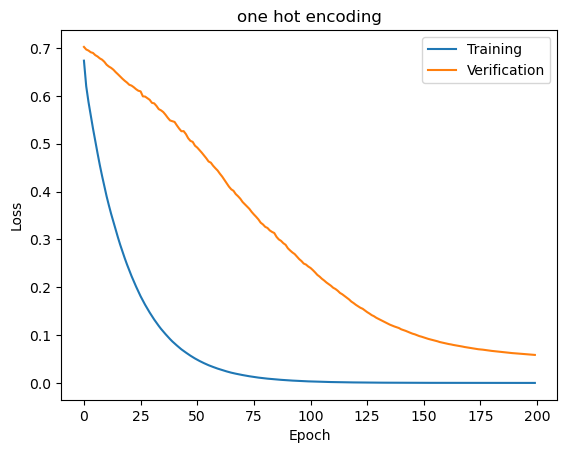

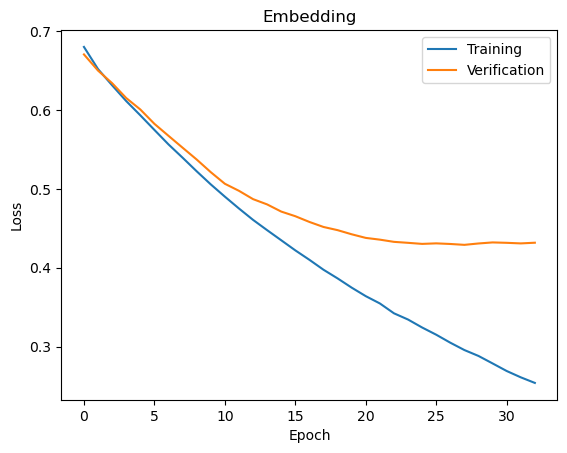

In [30]:
if __name__ == '__main__':
    
    # 원핫
    history1 = train_o ()
    # Embedding
    history2   = train_e() 
    
    
    showHistoryGraph(history1, "one hot encoding" )
    showHistoryGraph(history2, "Embedding") 
 
